In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("dataset.csv")

In [4]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
data.shape

(303, 14)

In [7]:
data['target'].unique()
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000143569FEE88>,
      dtype=object)

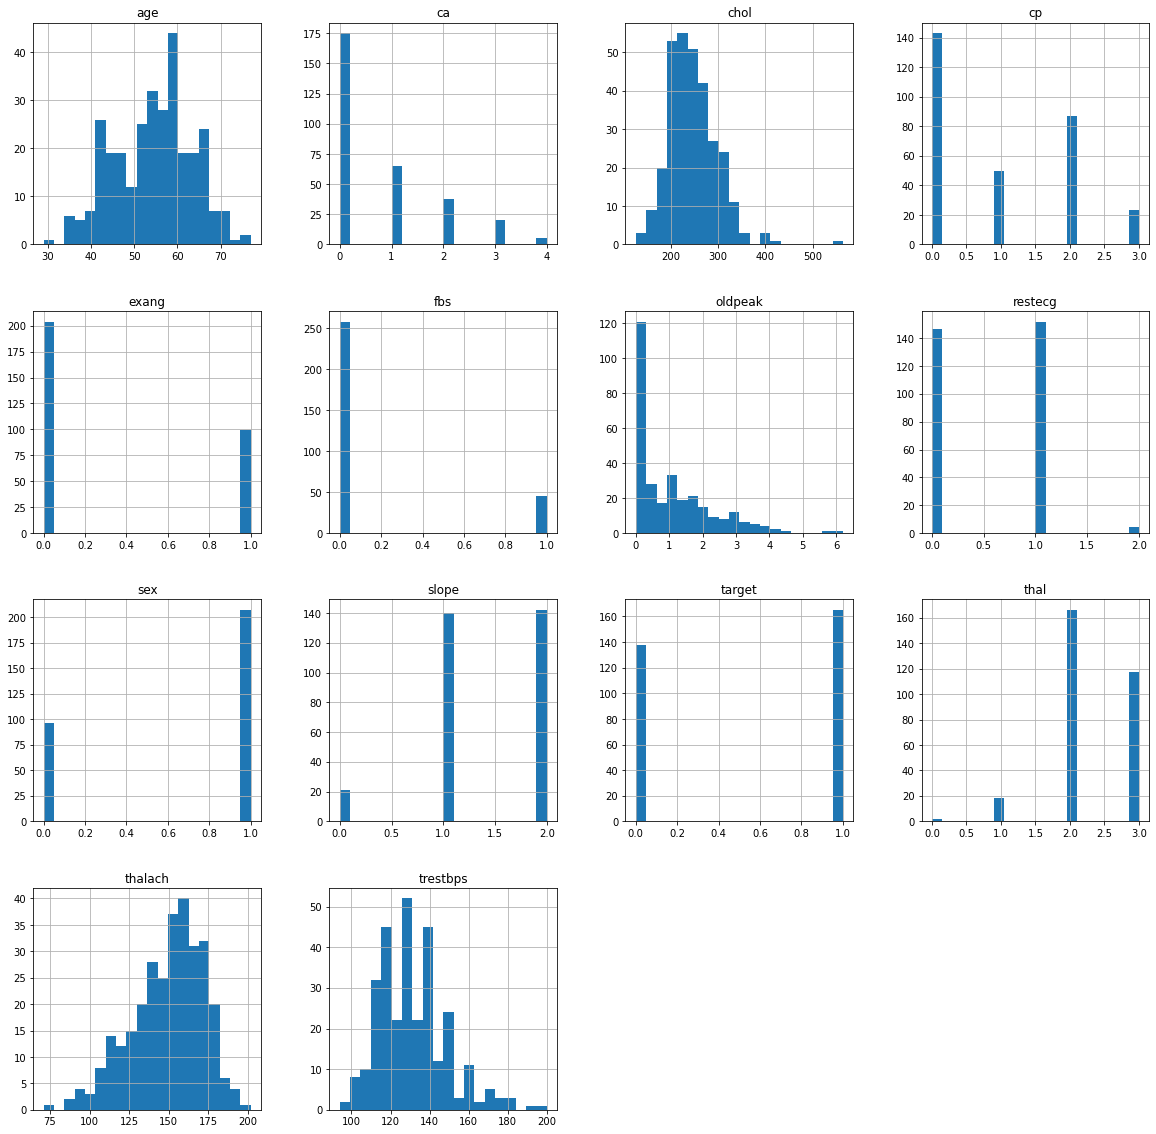

In [8]:
data.hist(bins=20,figsize=(20,20))

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
import seaborn as sns

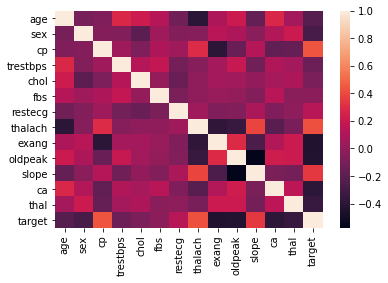

In [11]:
sns.heatmap(data.corr(),)

In [13]:
corr=data.corr()
corr['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [15]:
x=data.drop('target',axis=1)
y=data['target']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(x)

In [18]:
scaled=pd.DataFrame(scaled,columns=x.columns)

In [21]:
scaled.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [40]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [41]:
log_pred=log.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,log_pred)

array([[16,  7],
       [ 9, 29]], dtype=int64)

In [43]:
accuracy_score(y_test,log_pred)

0.7377049180327869

In [44]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)
random_pred=random.predict(x_test)

In [45]:
confusion_matrix(y_test,random_pred)

array([[18,  5],
       [10, 28]], dtype=int64)

In [46]:
accuracy_score(y_test,random_pred)

0.7540983606557377

In [47]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(random,x,y, scoring = 'accuracy').mean()

In [48]:
cv

0.8248087431693989

In [49]:
cv=cross_val_score(log,x,y, scoring = 'accuracy').mean()

c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

In [50]:
cv

0.8249180327868852

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

In [73]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [74]:
knn_pred=knn.predict(x_test)

In [75]:
confusion_matrix(y_test,knn_pred)

array([[18,  5],
       [11, 27]], dtype=int64)

In [76]:
accuracy_score(y_test,knn_pred)

0.7377049180327869